<div style='display: flex; flex-direction: row; align-items: center; justify-content: space-between; color: black;  background: #fbe216; margin-right: 50px; height: 100px;'>
<h1 style="width: 90%; text-align: center; padding-top: 20px; font-weight:bold;">Projet Algorithmique Avancée</h1>
<img src="https://www.cesi.fr/wp-content/uploads/2022/07/lg_cesi.png" style="width: 100px; height: 100px;">
</div>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Prérequis</h4>

Ce document intégre des codes Python. Pour pouvoir les exécuter, les paquets ci-après sont requis. Il suffit simplement de lancer la prochaine cellule pour les installer automatiquement dans l'environnement en cours.

In [79]:
!pip install numpy
!pip install matplotlib
!pip install networkx
!pip install pulp

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pulp
import time
from ipywidgets import IntProgress
from IPython.display import display

<p>
    Aujourd'hui, la réduction des émissions de gaz à effet de serre est un enjeu prioritaire pour de nombreux pays. De nombreux accords ont été signés entre les états. Les premiers engagements, sont apparus lors de la signature du protocole de Kyoto en 1997. Les scientifiques jugent aujourd'hui insufisant l'entrée en vigueur de ce protocole face à l'avancement du réchauffement climatique.<br/>
    L'action est donc portée sur un changement des comportements au sein de notre société pour essayer de diminuer notre impact environnemental. Ceci commence notamment avec une adaptation de l'usage des transports.
</p>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Présentation de l'équipe en charge du projet</h4>

<table style="border: none;">
    <tbody style="border: none;">
        <tr style="border: none;">
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mrPh_yseUFfOwtw3T7wvGeQdKdXiR8yh_3CjvI4iWvuvra7VV8dRTKsZiE8hJ3bolrevZjC4hL0yRh8Edzq-e4zxUuJYBrx8DIjYvzTb5UAf64CuMMSt1zzjMv4d5rmrqqCsrEo2S3wWh9E2eHvMYpyy9XcvZo7fkQf1O2inCrm7TLMXn8L3dUK7HSEvVABnb?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mdrJBIrMjk5K4hzU8-NjQcWUPl16XfAnWJ3A8cQO9quUGBzFtPOWRlPFmVbyz65M2lWD-zj44bSaP7I4jEHGwNh71ojMqM0wlAX-iRZzav3XJugn5CBOQzmWqGmCvlJtYhk_7WIJYEF7cCXavTmJYvPaOyNrqrK_s2Vq7pGAvvwCw2MhIsyp-E1UMCmL1G6Lu?width=800&height=800&cropmode=none" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4moTSNS4nfGmU6y_-tBqjzSg2T1fbVCmQv0BRlF96XsCtOaxYssk6atj-pjWt9igxxffMkB30nwdea-QVGu4KllEAKuJ5zmtOJNEznMIDbg0NebAFskm70eaCtgsaKJ0uNMK4O9EWekPkDejQRAQZP2THzIexzWX124wwKoBW2Y83Ib2Ux7hlUpMf5a2qlkaFy?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://media.licdn.com/dms/image/C4E03AQG1N6JHdPo1Tg/profile-displayphoto-shrink_800_800/0/1632410457548?e=1691020800&v=beta&t=m4IyU1snzhLHpoNZJk5ducohQaV4ppT-lrrEFjJfJrI">
            </td>
        </tr>
        <tr style="border: none;">
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Victor BILLAT <br/><br/> <span style="font-weight:normal;">Chef de projet</span></p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Vincent VERLAAN</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Valentin GIRAUDEAU</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Maxime DUCASSE</p>
            </td>
        </tr>
    </tbody>
<table>
<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Identification du problème</h2>
    <p>
        Pour répondre, à l'appel d'offre lancé par l'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie), notre équipe CesiCDP décide d'orienter son travail sur la gestion de tournées de livraison. Pour cela, nous souhaitons mettre en place une solution algortihmique permettant de minimiser le temps d'une tournée de livraison entre différentes villes au travers d'un réseau routier.
        <br/>
        L'objectif de ce projet consiste en :
    </p>
    <ul>
        <li>La réalisation d'un algorithme capable d'accueillir des entrées de tailles variables.</li>
        <li>Une étude statistique du comportement du dit algorithme.</li>
    </ul>
    <h4 style="color: #fbe216">Contraintes :</h4>
        <p>
            Nous avons fait le choix d'implémenter certaines contraintes à notre projet pour essayer d'obtenir des résultats plus réalistes qui tiennent compte de contraintes techniques du domaine des transport routiers. Parmis une liste de suggestions, nous en avons séléctionné deux pour notre problème :
        </p>
        <ul>
            <li><strong>Traffic :</strong> L'algorithme sera capable de prendre en compte des évolutions du traffic sur les différents axes en fonction des horaires de la journée. Ceci aura un impact sur la vitesse de déplacement de nos camions. Ainsi, le temps du circuit de livraison pourra être impacté.</li>
            <li><strong>Nombre de camions :</strong> L'algorithme devra tenir compte d'un nombre de camions disponibles simultanément pour pouvoir répartir les livraisons. Le calcul de la tournée inclura l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimisera la date de retour du dernier camion au dépôt.
            </li>
        </ul>
    <h4 style="color: #fbe216">Autres problèmes connus :</h4>
        <p>
            Notre problème correspond au <strong>problème de tournées des véhicules (Véhicule Routing Problem, VRP)</strong>. Ce dernier cherche à déterminer les différents trajets empruntés par une flotte de véhicules pour livrer différents clients avant de revenir au dépôt. Le but de ce problème est de minimiser le temps de livraison des différents produits.
        </p>
        <p>
            Le problème VRP est un dérivé de celui du <strong>voyageur du commerce (Travelling Salesman Problem, TSP)</strong>. Ce dernier ne prend en considération qu'un seul véhicule pour effectuer la tournée et ainsi consiste à déterminer, selon un ensemble de villes et les distances les séparant, une tournée la plus courte pour livrer chacune des villes une et une seule fois. Ceci revient à chercher le plus court cycle hamiltonien dans un graphe G.
        </p>


<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Définition mathématique du problème</h2>
    <h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Problème de décision</h4>
    <p>
        Durant notre projet, nous allons chercher à répondre au problème de décision suivant : 
        <em>"Est-il possible de créer des itinéraires pour un ensemble de véhicules, partant tous d'un même dépôt, afin de livrer des marchandises à un ensemble de clients, en tenant compte des conditions de circulations, de sorte à minimiser le temps total de livraison ?"</em>        
    </p>

En prenant en compte un graphe pondéré $G$ dont les sommets $V_i$ (de l'ensemble des sommets $V$) représentent les villes et dont les arêtes $E_j$ (de l'ensemble des arêtes $E$) représentent les routes entre chacunes de ces villes, le problème de décision précédent devient : <em>"Est-il possible de trouver dans $G$, $n$ cycles où chaque cycle représente le trajet d'un véhicule partant tous d'un même sommet $V_0$, afin que chaque sommet soit dans un cycle et de sorte à minimiser le temps de livraison $t$ ?"</em>


<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Problème d'optimisation</h4>

De ce problème de décision, nous allons chercher à optimiser le temps de livraison. Pour cela, on formule le problème d'optimisation suivant : "Quelle est la plus petite valeur de $t$ pour laquelle la réponse au problème de décision est 'oui'" ?

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Complexité</h2>

Pour savoir dans quelle classe de complexité se situe notre problème, on va chercher à déterminer si :
- Il peut être résolu en temps polynomial, il sera polynomial, alors il appartiendra à la classe $\text{P}$,
- Il peut être vérifiable mais non résolvable en temps polynomial, alors il appartiendra à la classe $\text{NP}$,
- Il est possible de réduire tout problème à ce problème, alors il appartiendra à la classe $\text{NP-Difficile}$,
- Il appartient à la fois à la classe $\text{NP}$ et à la classe $\text{NP-Difficile}$, alors il appartient aussi à la classe $\text{NP-Complet}$

Commençons par voir s'il est possible de vérifier qu'une proposition est bien solution de notre problème en trouvant un algorithme capable de faire cette validation en temps polynomial. Un algorithme dans ce cas pourrait être le suivant :

<div>
    <p> Soit une liste <strong>L</strong> de <strong>n</strong> cycles notés (<strong>C<sub>i</sub></strong> pour <strong>i</strong> allant de <strong>1</strong> à <strong>n</strong>). On crée un dictionnaire <strong>D</strong> ayant pour paire clé/valeur un sommet et un booléen.<br/>
    Exemple : <code>D={S<sub>1</sub>: True, ... S<sub>n</sub>: False}</code>
    </p>
    <blockquote>
    <p>
        Pour chaque cycle <strong>C<sub>i</sub><br/></strong>
        <span style="padding-left: 30px;">
        Si le point de départ n'est pas le même qu'à l'arrivée et qu'il ne correpond pas au dépôt
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 30px;">
            Pour chaque sommet <strong>S</strong> du cycle <strong>C<sub>i</sub></strong>
        </span><br/>
        <span style="padding-left: 60px;">
            Si la valeur du dictionnaire pour le sommet <strong>S</strong> est <strong>Vrai</strong>
        </span><br/>
        <span style="padding-left: 90px;">
            Le sommet a déjà été visité donc la solution n'est pas valide
        </span><br/>
        <span style="padding-left: 90px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 60px;">
            Sinon
        </span><br/>
        <span style="padding-left: 90px;">
            On met la valeur du dictionnaire pour le sommet <strong>S</strong> à <strong>1</strong>
        </span><br/>
        Pour chaque sommet <strong>S<sub>i</sub></strong> du dictionnaire<br/>
        <span style="padding-left: 30px;">
        Si le sommet n'a pas été visité
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
    </p>
    </blockquote>
<div>

<p>
On peut appliquer cet algortihme à un exemple pour vérifier sa fonctionnalité :
</p>

<div style="display:flex; flex-direction:row; justify-content: space-between;">
    <img style="width: 500px;" src="https://i.imgur.com/u5V0Bhv.png">
    <img style="width: 500px;" src="https://i.imgur.com/mi2oN6d.png">
</div>

In [81]:
def is_solution_valid(individual, num_clients, number_of_trucks, starting_point=0):
    dict_clients = {i:0 for i in range(0, num_clients + 1)}
    is_valid = True

    if len(individual) != number_of_trucks:
        print("Number of trucks is not correct")
        is_valid = False

    for truck, trajet in individual.items():
        # Check if starting point and ending point are the same
        if trajet[0] != starting_point or trajet[-1] != starting_point:
            print(f"The tour of truck {truck} does not start and end at the starting point with id {starting_point}")
            is_valid = False
            break
        
        # Count the number of visits for each client
        for client in trajet[1:-1]:
            dict_clients[client] += 1

    # Check if a client is visited more than once
    for client, nb_visits in dict_clients.items():
        if nb_visits != 1 and client != starting_point:
            print(f"Client {client} is visited {nb_visits} times")
            is_valid = False
            break

    return is_valid

print(is_solution_valid({0:[2, 0, 1, 3, 2], 1:[2, 5, 4, 2]}, 5, 2, starting_point=2))

True


Comme on peut le voir, notre algorithme de vérification va contrôler les $n$ sommets de notre graphe afin de s'assurer qu'ils sont tous visités une et une seule fois par un camion lors de sa tournée de livraison. Ce programme à donc une complexité qui est polynomial valant : $O(N)$.
Ainsi, le problème étant vérifiable de façon polynomial, nous pouvons attribuer ce dernier à la classe $NP$.

De plus, notre problème s'apparente à celui du voyageur du commerce qui est $\text{NP-Complet}$ c'est-à-dire qu'il appartient aussi bien à la classe $NP$ qu'à la classe $\text{NP-Difficile}$. Pour rappel, le voyageur du commerce est un problème qui consiste à déterminer s'il existe un cycle qui parcourt tous les sommets d'un graphe une et une seule fois.
<br/><br/>
Dans notre cas, notre programme est capable de résoudre un problème similaire en ayant $k$ véhicules qui livrent. Ainsi, une instance $I$ du voyageur du commerce, peut être réduite à une instance $I_2$ de notre problème en prenant $k=1$. Cette réduction, nous permet d'associer un problème $\text{NP-Difficile}$ à notre problème $NP$. Ceci rend notre problème au moins aussi difficile qu'un problème de la classe $\text{NP-Difficile}$. On peut ainsi dire que le problème de tournées de véhicules auquel nous essayons de répondre, appartient à la classe $NP$ et $\text{NP-Difficile}$ ce qui le rend $\text{NP-Complet}$.

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Modélisation mathématique du problème</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Variables</h4>

$G$ : Un graphe complet pondéré avec $n$ sommets<br/>
$K$ : l'ensemble de tous les camions participant à la tournée <br/>
$N$ : l'ensemble des nombres entiers positifs <br/>
$V$ : l'ensemble des $n$ sommets du graphe $G$ <br/>
$E$ : l'ensemble des arêtes du graphe $G$ <br/>
$k$ : un camion donné de l'ensemble $K$ <br/>
$x_{ij}$ : une variable booléene vérifiant : "L'arête entre le sommet $i$ et le sommet $j$ est empruntée", d'où $x_{ijk}$ une variable booléene vérifiant "L'arête entre le sommet $i$ et le sommet $j$ est empruntée par le camion $k$" <br/>
$y_{i}$ : une variable booléene vérifiant : "Le sommet $i$ est visité", d'où $y_{ik}$ une variable booléen vérifiant "Le sommet $i$ est visité par le camion $k$ <br/>
$c_{ij}(h)$ : le poids de l'arête entre le sommet $i$ et le sommet $j$ à l'heure $h$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Fonction Economique</h4>

<!-- $$\text{Minimiser} \qquad t = \sum_{k \in K}\sum_{i \in V}\sum_{j \in V}{x_{ijk} c_{ij}(h)}$$ -->
$$\min \sum_{i=0}^{n} \sum_{j=0}^{n} \sum_{k=1}^{K} \sum_{t=0}^{T-1} c_{ijt} \cdot x_{ijkt}$$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Contraintes</h4>

<!-- - Chaque véhicule quitte le client qu'il visite -->

<!-- $$\sum_{i=0}^{n}x_{ijk} = \sum_{i=0}^{n}x_{jik} \qquad \forall j \in \{0,...,n\},\quad \forall k \in \{0,...,|K|\}$$ -->

<!-- $$\sum_{i=0}^{n} x_{ijkt} = \sum_{i=0}^{n} x_{jikt} \qquad \forall k \in \{1, ..., K\}, \forall j \in \{1, ..., n\}, \forall t \in \{0, ..., T-1\}$$ -->

<!-- - Chaque client est visité une seule fois -->

<!-- $$\sum_{k=0}^{|K|} \sum_{i=0}^{n}x_{ijk}=1 \qquad \forall j \in \{1,...,n\}$$ -->

<!-- $$\sum_{k=1}^{K} \sum_{t=0}^{T-1} \sum_{i=0}^{n}x_{ijkt}=1 \qquad \forall j \in \{1, ..., n\}$$ -->

<!-- - Chaque camion quitte le dépôt à l'heure de départ (heure 0) -->

<!-- $$\sum_{j=1}^{n}x_{0jk0}=1 \qquad \forall k \in \{0,...,|K|\}$$ -->

<!-- - Elimination des sous-tours avec la méthode de Dantzig, Fulkerson et Johnson -->

<!-- <!-- $$y_{ikh} - y_{jkh} + (n+1) \cdot x_{ijkh} \leq n \qquad \forall i \in \{1, ..., n\}, \forall j \in \{1, ..., n\}, i \neq j, \forall k \in \{1, ..., K\}, \forall h \in \{0, ..., 24\} $$ --> 

 - Chaque client est visité une seule fois

 $$\sum_{j=1}^{n}\sum_{k=1}^{K} x_{ijk} = 1 \quad \forall i \in \{1, \ldots, n\}$$

 - Chaque véhicule quitte le dépôt

 $$\sum_{j=1}^{n} x_{0jk} = 1 \quad \forall k \in \{1, \ldots, K\}$$

 - Chaque véhicule revient au dépôt 

 $$\sum_{i=1}^{n} x_{i0k} = 1 \quad \forall k \in \{1, \ldots, K\}$$

 - Lorsqu'un véhicule visite un client, il doit aussi partir de ce client

 $$\sum_{j=1}^{n} x_{ijk} - \sum_{j=1}^{n} x_{jik} = 0 \quad \forall i \in \{1, \ldots, n\}, \forall k \in \{1, \ldots, K\}$$

 - Elimination des sous-tous

 $$0 \le y_{ik} \le n \quad \forall i \in \{1, \ldots, n\}, \forall k \in \{1, \ldots, K\}$$
 $$y_{ik} - y_{jk} + n*x_{ijk} \le n-1 \quad \forall i, j \in \{1, \ldots, n\}, i \neq j, \forall k \in \{1, \ldots, K\}$$



<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Méthode de résolution</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Structure de données envisagée</h4>
        
On compte générer notre graphe à l'aide d'une matrice d'adjacence de taille $n$ correspondant au nombre de sommet du graphe.

$$M_{i, j} = \begin{pmatrix} S_{1,1} & S_{1,2} & \cdots & S_{1,j} \\ S_{2,1} & S_{2,2} & \cdots & S_{2,j} \\ \vdots  & \vdots  & \ddots & \vdots  \\ S_{i,1} & S_{i,2} & \cdots & S_{i,j} \end{pmatrix}$$

$$\forall i \in [0,n] ; \text{et} ; \forall j \in [0,n]$$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Type de graphe à tester</h4>
    Nous allons réaliser le projet sur des graphes connexes. 
    Nous allons générer un graphe complet pour s'assurer que chacune de nos villes soit atteignable.
    Pour la taille des graphes, nous allons générer trois instances. Un graphe à 10 sommets, un deuxième à 100 sommets et un dernier à 1000 sommets.
    Les graphes seront pondérés en fonction du temps de parcours.
<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Méthode de génération des graphes</h4>

Pour générer les graphes, nous allons génerer leur matrice d'adjacence. Pour cela, étant donné que nos graphes ne sont pas orientés, nous allons générer une moitié de la matrice et par symétrie remplir la seconde moitié. Le code ci-dessous reprend ce procédé :

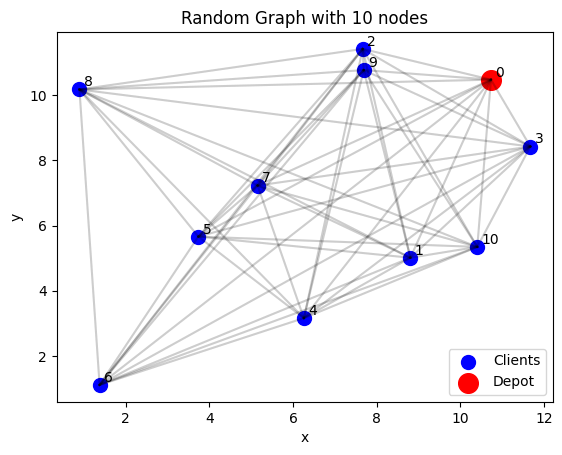

In [82]:
def generate_random_graph(n=10, weight_range=(1, 10)):
    """
    Generate a random graph with n nodes and random weights
    """
    xc = np.random.rand(n + 1)*12
    yc = np.random.rand(n + 1)*12

    # Generate initial traffic matrix
    adjacency_matrix = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            if i != j:
                adjacency_matrix[i, j] = np.sqrt((xc[i] - xc[j])**2 + (yc[i] - yc[j])**2)
                adjacency_matrix[j, i] = adjacency_matrix[i, j]

    return adjacency_matrix, xc, yc

n = 10 # Nombre de sommets
matrix, xc, yc = generate_random_graph(n)

plt.scatter(xc[1:], yc[1:], s=100, c='b', label="Clients")
plt.scatter(xc[0], yc[0], s=200, c='r', label="Depot")

# Draw edges
for i in range(n + 1):
    for j in range(n + 1):
        if i != j:
            plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='k', alpha=0.1)

# Annotations for nodes
for i in range(n + 1):
    plt.annotate(i, (xc[i] + 0.1, yc[i] + 0.1))

plt.title(f"Random Graph with {n} nodes")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Algorithme de résolution</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Implémentation</h4>
<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Fonction Traffic</h5>

Pour commencer l'implémentation de notre algorithme génétique, nous allons tout d'abord commencer par définir la fonction qui permettra de représenter les variation de traffic en fonction de l'heure. Celle-ci renverra une coefficient multiplicateur qui sera appliqué au poid de l'arête visitée.

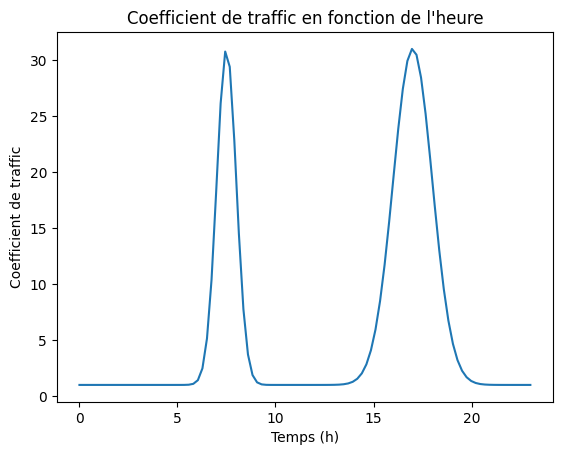

In [83]:
def traffic(x):
    return (30 * np.exp(-(x-7.5)**2 / (2 * 0.5**2)) + 30 * np.exp(-(x-17)**2 / (2 * 1**2))) + 1

x = np.linspace(0, 23, 100)
plt.plot(x, traffic(x))
plt.title("Coefficient de traffic en fonction de l'heure")
plt.xlabel("Temps (h)")
plt.ylabel("Coefficient de traffic")
plt.show()

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Phase d'initialisation</h5>
Les algorithmes génétiques sont des méthodes d'optimisation et de recherche basées sur les principes de la génétique et de la sélection naturelle fondée grace à la théorie de Darwin.
Pour fonctionner, celui-ci utilisent les concepts biologiques de la reproduciton entre individus, de la mutation génétique et de la séléction pour explorer un espace de recherche afin de déterminer des solutions optimales.<br/>
La première phase du problème consiste à créer des individus qui représenteront des solutions candidates.
Nos solutions ont la forme suivante :<br/>

$$
    \begin{cases}
        v_1 : 0 \quad 1 \quad 6 \quad 5 \quad 0 \\ 
        v_2 : 0 \quad 2 \quad 3 \quad 8 \quad 0 \\
        v_3 : 0 \quad 4 \quad 9 \quad 7 \quad 0
    \end{cases}
$$

Chaque véhicule à une tournée qui lui est associée. Pour pouvoir ensuite facilement réaliser nos opérations de croisement et de mutation, nous allons représenter les chromosomes sous une autre forme en soustrayant le point de départ et d’arrivée et en concaténant les points de chaque véhicule :

$$
\begin{cases}
    indices : 0 \quad 3 \quad 6 \\ 
    chromosome : 1 \quad 6 \quad 5 \quad 2 \quad 3 \quad 8 \quad 4 \quad 9 \quad 7
\end{cases}
$$

On peut ainsi mettre en place une focntion permettant de génerer ces individus :

In [84]:
def create_individual(nb_truck, nb_client, starting_point=0):
    """
    Create a random individual
    """
    individual = {}
    clients = list(range(1, nb_client))
    random.shuffle(clients)
    
    groups = np.array_split(clients, nb_truck)
    for i, group in enumerate(groups):
        individual[i] = [starting_point] + list(group) + [starting_point]
    return individual

individual = create_individual(3, 9, starting_point=0)
print(individual)

{0: [0, 7, 5, 4, 0], 1: [0, 1, 8, 2, 0], 2: [0, 6, 3, 0]}


On le voit cette fonction génère un individu qui est représenté selon la première forme enoncée précedement. Pour pouvoir passer d'une forme à l'autre, nous ajoutons deux nouvelles fonctions :

In [85]:
def individual_to_lists(individual):
    """
    Convert an individual to a list of lists
    """
    # For each truck, we create a list of clients
    nodes = []
    index = []

    for truck in individual:
        index_of_truck = len(nodes)
        index.append(index_of_truck)

        nodes_of_truck = individual[truck]
        nodes += nodes_of_truck[1:-1]

    return nodes, index

def individual_to_dict(individual_as_list, starting_point=0):
    """
    Convert an individual to a dict of lists
    """
    # For each truck, we create a list of clients
    nodes, index = individual_as_list
    individual = {}
    for i, truck in enumerate(index):
        if i == len(index) - 1:
            individual[i] = [starting_point] + nodes[truck:] + [starting_point] 
        else:
            individual[i] = [starting_point] + nodes[truck:index[i+1]] + [starting_point] 

    return individual

Avec ces deux méthodes, nous pourrons pas la suite réaliser nos opérations de croisement et de mutation.
Maintenant, il nous faut génerer une population contenant plusieurs individus. En effet c'est grâce à cette population que nous allons pouvoir déterminer notre solution en réalisant des opérations de séléction de nos meilleurs individus.

In [86]:
def create_population(nb_truck, nb_client, starting_point=0, size=100):
    """
    Create a population of individuals
    """
    population = []
    for i in range(size):
        population.append(create_individual(nb_truck, nb_client, starting_point))
    return population

population = create_population(3, 9, starting_point=0, size=10)
print(population)

[{0: [0, 1, 2, 5, 0], 1: [0, 7, 4, 8, 0], 2: [0, 3, 6, 0]}, {0: [0, 5, 3, 7, 0], 1: [0, 4, 8, 1, 0], 2: [0, 2, 6, 0]}, {0: [0, 4, 3, 2, 0], 1: [0, 1, 5, 8, 0], 2: [0, 6, 7, 0]}, {0: [0, 2, 3, 5, 0], 1: [0, 4, 8, 1, 0], 2: [0, 7, 6, 0]}, {0: [0, 2, 8, 7, 0], 1: [0, 6, 1, 5, 0], 2: [0, 4, 3, 0]}, {0: [0, 6, 3, 1, 0], 1: [0, 8, 5, 2, 0], 2: [0, 7, 4, 0]}, {0: [0, 3, 1, 6, 0], 1: [0, 7, 4, 5, 0], 2: [0, 2, 8, 0]}, {0: [0, 1, 5, 7, 0], 1: [0, 2, 6, 8, 0], 2: [0, 3, 4, 0]}, {0: [0, 2, 5, 1, 0], 1: [0, 6, 7, 4, 0], 2: [0, 3, 8, 0]}, {0: [0, 3, 1, 6, 0], 1: [0, 2, 8, 5, 0], 2: [0, 4, 7, 0]}]


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Phase d'évaluation</h5>

Pour sélectionner nos individus, nous allons devoir leur attribuer un score. Ce score va être calculé grace à notre fonction objectif. En fonction des chemins par lesquels nos camions circuleront et selon le traffic au moment où nos camions se déplaceront nous pourrons établir un score pour un individu.

In [87]:
def fitness(individual, adjency_matrix, departure_time):
    """
    Compute the fitness of an individual with traffic
    """
    fitness = 0        
    for truck in individual:
        start_time = departure_time
        for i in range(len(individual[truck])-1):
            weight = adjency_matrix[individual[truck][i]][individual[truck][i+1]]
            fitness += weight * traffic(start_time)
            start_time += (weight / 60)
    return fitness

start_time = 1 # Heure de départ
print(round(fitness(individual, matrix, start_time), 2), "minutes")

74.19 minutes


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Phase de séléction</h5>

La phase de séléction consiste à conserver des individus pour la reproduction. Il existe plusieurs stratégies de sélection, comme la sélection par roulette (plus le score d'un individu est élevé, plus il a de chances d'être sélectionné) ou la sélection par tournoi (séléction aléatoire de quelques individus et conservation du meilleur parmi eux). Dans notre cas nous choisissons de séléctionner les $k$ meilleurs individus de la population c'est à dire les $k$ premiers individus ayant le score le plus faible puisque notre objectif est de <strong>minimiser</strong> notre fonction économique.

In [88]:
def selection(population, adjency_matrix, start_hour, k):
    """
    Select the best individuals in the population
    """
    population = sorted(population, key=lambda x: fitness(x, adjency_matrix, departure_time=start_hour))
    return population[:k]

selected = selection(population, matrix, start_hour=1, k=5)
print("Score de la population :", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))
print("Score des individus séléctionnés :", sorted([round(fitness(individual, matrix, start_time), 2) for individual in selected]))

Score de la population : [71.03, 71.54, 72.09, 75.38, 77.34, 77.35, 80.76, 84.68, 85.27, 91.19]
Score des individus séléctionnés : [71.03, 71.54, 72.09, 75.38, 77.34]


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Phase de croisement</h5>

In [89]:
def crossover(individu1, individu2):
    """
    Crossover between two individuals
    """
    # Transform both individuals into a list
    nodes_individu1, index_individu1 = individual_to_lists(individu1)
    nodes_individu2, index_individu2 = individual_to_lists(individu2)

    # Select a random crossover point
    crossover_point = random.randint(0, len(nodes_individu1)-1)

    # Create the new individuals
    new_individu1 = nodes_individu1[:crossover_point]
    new_individu2 = nodes_individu2[:crossover_point]

    # Add the remaining nodes in the order they appear in the other parent
    for node in nodes_individu2:
        if node not in new_individu1:
            new_individu1.append(node)
    
    for node in nodes_individu1:
        if node not in new_individu2:
            new_individu2.append(node)

    # Transform the new individuals into a dictionary
    new_individu1 = individual_to_dict((new_individu1, index_individu1))
    new_individu2 = individual_to_dict((new_individu2, index_individu2))

    return new_individu1, new_individu2

individu1 = create_individual(3, 9, starting_point=0)
individu2 = create_individual(3, 9, starting_point=0)
print("Individu 1 :", individu1)
print("Individu 2 :", individu2)
new_individu1, new_individu2 = crossover(individu1, individu2)
print("Nouvel individu 1 :", new_individu1)
print("Nouvel individu 2 :", new_individu2)

Individu 1 : {0: [0, 6, 5, 2, 0], 1: [0, 3, 7, 1, 0], 2: [0, 8, 4, 0]}
Individu 2 : {0: [0, 7, 8, 6, 0], 1: [0, 5, 1, 3, 0], 2: [0, 2, 4, 0]}
Nouvel individu 1 : {0: [0, 6, 5, 2, 0], 1: [0, 3, 7, 1, 0], 2: [0, 8, 4, 0]}
Nouvel individu 2 : {0: [0, 7, 8, 6, 0], 1: [0, 5, 1, 3, 0], 2: [0, 2, 4, 0]}


Maintenant qu nous avons réussi à croiser deux individus, il va falloir conserver de la diversité dans notre population.

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Phase de mutation</h5>

Pour conserver de la diversité dans notre population et faire en sorte que notre algorithme ne passe pas à côté de solutions pouvant être plus optimales que celle sur laquelle il se dirige, nous allons ajouter de la mutation sur nos nouveaux individus.
Pour réaliser ce processus, deux gênes vont être séléctionnés au hasard pour être inversés.

In [90]:
def mutation(individual, adjency_matrix):
    """
    Mutate an individual
    """
    # Transform the individual into a list
    nodes, index = individual_to_lists(individual)

    # We need to select two clients
    client1, client2 = random.sample(range(0, len(nodes)), 2)

    # We need to swap the two clients
    nodes[client1], nodes[client2] = nodes[client2], nodes[client1]

    # Transform the new individual into a dictionary
    individual = individual_to_dict((nodes, index))

    return individual

individu_mute = mutation(individu1, matrix)
print("Individu 1 :", individu1)
print("Individu muté :", individu_mute)

Individu 1 : {0: [0, 6, 5, 2, 0], 1: [0, 3, 7, 1, 0], 2: [0, 8, 4, 0]}
Individu muté : {0: [0, 6, 5, 4, 0], 1: [0, 3, 7, 1, 0], 2: [0, 8, 2, 0]}


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Remplacement de la pouplation</h5>

Maintenant que nous savons génerer une population, séléctionner les meilleurs individus, réaliser des croisement entre individus et des mutations sur les nouveaux individus, nous allons pouvoir créer une fonction pour renouveler notre population.
Pour se faire, on va créer une nouvelle population de même taille que la population parent en procédant à des croisement et des mutations. On va ensuite conserver les meilleurs individus de ces deux populations confondus pour revenir à la même taille que notre population d'origine.

In [91]:
def renew_population(population, adjency_matrix, mutation_rate, start_hour):
    """
    Renew the population
    """
    size_of_population = len(population)
    new_population = []

    while(len(new_population) < size_of_population):
        parent1, parent2 = random.sample(population, 2)
        child1, child2 = crossover(parent1, parent2)

        if random.random() < mutation_rate:
            child1 = mutation(child1, adjency_matrix)
        if random.random() < mutation_rate:
            child2 = mutation(child2, adjency_matrix)

        new_population.append(child1)
        new_population.append(child2)

    return selection(population + new_population, adjency_matrix, start_hour, k=size_of_population)

population = create_population(3, 9, starting_point=0, size=10)
print("Score de la population :", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))
population = renew_population(population, matrix, mutation_rate=0.5, start_hour=1)
print("Score de la population :", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))

Score de la population : [65.67, 71.07, 71.22, 74.47, 77.62, 79.06, 80.34, 81.81, 82.37, 83.74]
Score de la population : [65.67, 65.67, 65.67, 69.93, 71.07, 71.07, 71.22, 72.81, 74.47, 75.82]


On remarque que le score de notre nouvelle population diminue. Maintenant, on va définir quand notre algorithme devra s'arrêter de fonctionner.

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Convergence</h5>

In [92]:
def convergence(population, adjency_matrix, start_hour):
    """
    Check if the population has converged
    """
    # We need to check if all the individuals have the same fitness
    fitnesses = [fitness(individual, adjency_matrix, start_hour) for individual in population]
    return len(set(fitnesses)) == 1

In [93]:
def plot_graph(adjency_matrix, xc, yc, routes, best_individual):
    """
    Plot two graphs :
        - The graph of the clients
        - The graph of the routes
    On each graph represent the starting point with a bigger red circle and the clients with blue circles
    Draw each routes on the second graph with different colors
    """
    # Create a list of colors
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the graph of the clients
    ax[0].scatter(xc, yc, s=100, c='b')
    ax[0].scatter(xc[0], yc[0], s=200, c='r')
    ax[0].set_title("Clients")

    # Plot the graph of the routes
    ax[1].scatter(xc, yc, s=100, c='b')
    ax[1].scatter(xc[0], yc[0], s=200, c='r')
    ax[1].set_title("Routes")

    # Draw the routes
    for i, route in enumerate(routes):
        ax[1].plot(xc[best_individual[route]], yc[best_individual[route]], c=colors[i%len(colors)])

    # Annotation of the clients
    for i, txt in enumerate(range(len(xc))):
        ax[0].annotate(txt, (xc[i] + 0.1, yc[i] + 0.1))
        ax[1].annotate(txt, (xc[i] + 0.1, yc[i] + 0.1))

    plt.show()

def genetic_algorithm(adjency_matrix, nb_truck, start_hour=8, starting_point=0, population_size=100, mutation_rate=0.15):
    """
    Run the genetic algorithm
    """
    # Calculate the number of clients from the adjency matrix
    nb_client = len(adjency_matrix)

    # Create the initial population
    population = create_population(nb_truck, nb_client, starting_point, population_size)
    # While the population has not converged
    t = 0
    while not convergence(population, adjency_matrix, start_hour):
        # Renew the population
        population = renew_population(population, adjency_matrix, mutation_rate, start_hour)
        t += 1
        # print("Iteration:", t, "Convergence:", convergence(population, adjency_matrix), "Best individual:", fitness(selection(population, adjency_matrix, k=1)[0], adjency_matrix))
    # Select the best individual
    best_individual = selection(population, adjency_matrix, start_hour,k=1)[0]
    
    # print("-"*50)
    # print("Number of iterations:", t)
    # print("Best individual:", best_individual)
    # print("Fitness:", fitness(best_individual, adjency_matrix, start_hour))
    # print("-"*50)
    
    # # For each truck, print the route and the distance
    # for truck in best_individual:
    #     print("Truck:", truck)
    #     print("Route:", best_individual[truck])
    #     distances = []
    #     for i in range(len(best_individual[truck]) - 1):
    #         distances.append(matrix[best_individual[truck][i]][best_individual[truck][i+1]])
    #     print("Distance:", sum(distances))
    #     print("-"*50)

    # # Plot the graph
    # plot_graph(adjency_matrix, xc, yc, best_individual, best_individual)

    return best_individual
    

In [94]:
# --------------- Variables --------------- #
n = 10 # Number of clients
number_of_truck = 3 # Number of trucks
starting_point = 0 # Starting point
start_hour = 7 # Starting hour for the trucks

population_size = 100 # Size of the population generated by the genetic algorithm
k = 10 # Number of best individuals selected to reproduce
mutation_rate = 0.15 # Mutation rate

# --------------- Main --------------- #
matrix, xc, yc = generate_random_graph(n)
best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)

# --------------- Results --------------- #
print("Best individual:", best_individual)
print("Fitness:", fitness(best_individual, matrix, start_hour))

Best individual: {0: [0, 8, 6, 10, 2, 0], 1: [0, 5, 7, 4, 0], 2: [0, 1, 3, 9, 0]}
Fitness: 1093.2613415022033


<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Plan d'expérience</h2>

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Qu'est ce qu'un plan d'expérience</h5>

Il s'agit d'une méthodologie qui vise à organiser et à structurer les différentes étapes d'une expérience scientifique ou d'une étude pour obtenir des résultats fiables et significatifs. C'est une approche systémique (l'approche systémique fait référence à une méthode d’analyse, une façon de traiter un système complexe avec un point de vue global sans se focaliser sur les détails) qui permet de déterminer comment les facteurs d'intérêt doivent être manipulés, quelles mesures doivent être prises et comment les données doivent être collectées et analysées.

A travers ce plan d’expérience, on cherche à évaluer la performances de notre algorithme. Les métriques d’évaluation sont le temps d’exécution et la qualité du résultat selon l’instance.

Pour la qualité de la solution, nous utiliserons un algorithme simplexe afin de savoir la solution optimale pour une instance souhaitée. Nous comparerons ensuite ce résultat avec le résultat de notre algorithme. Nous testerons une dizaine de foi chaque instance. Nous ferons ensuite une moyenne des résultats pour chaque instances testées.

Nous allons faire varier l’instance selon plusieurs paramètres d’entrée tel que :
- Le nombre de villes à livrer (sommets)
- Le nombre de camion
- La taille de la population généré par l’algorithme génétique
- Le nombre d’individu sélectionné pour se reproduire
- Le taux de mutation

In [95]:
problem = pulp.LpProblem("VRP", pulp.LpMinimize)
K = number_of_truck
x = pulp.LpVariable.dicts("x", [(i,j,k) for i in range(n+1) for j in range(n+1) for k in range(K)], lowBound=0, upBound=1, cat='Binary')
y = pulp.LpVariable.dicts("y", [(i,k) for i in range(n+1) for k in range(K)], lowBound=0, cat='Continuous')

problem += pulp.lpSum([matrix[i][j]*x[(i,j,k)] for i in range(n+1) for j in range(n+1) for k in range(K)])

# Chaque client est visité exactement une fois
for i in range(1, n+1):
    problem += pulp.lpSum([x[(i,j,k)] for j in range(n+1) for k in range(K)]) == 1

# Chaque véhicule quitte le dépôt
for k in range(K):
    problem += pulp.lpSum([x[(0,j,k)] for j in range(1, n+1)]) == 1

# Chaque véhicule revient au dépôt
for k in range(K):
    problem += pulp.lpSum([x[(i,0,k)] for i in range(1, n+1)]) == 1

# Lorsqu'un véhicule visite un client, il doit aussi partir de ce client
for k in range(K):
    for i in range(1, n+1):
        problem += pulp.lpSum([x[(i,j,k)] for j in range(n+1)]) - pulp.lpSum([x[(j,i,k)] for j in range(n+1)]) == 0

# Elimination des sous-tours
for k in range(K):
    for i in range(1, n+1):
        problem += y[(i,k)] >= 0
        problem += y[(i,k)] <= n

    for i in range(1, n+1):
        for j in range(1, n+1):
            if i != j:
                problem += y[(i,k)] - y[(j,k)] + n*x[(i,j,k)] <= n-1

problem.solve()

print("Status:", pulp.LpStatus[problem.status])
print("Objective:", pulp.value(problem.objective))

Status: Optimal
Objective: 12.883017971459577


In [98]:
problem = pulp.LpProblem("VRP", pulp.LpMinimize)
K = number_of_truck
H = 24  # number of time periods
x = pulp.LpVariable.dicts("x", [(i,j,k,h) for i in range(n+1) for j in range(n+1) for k in range(K) for h in range(H)], lowBound=0, upBound=1, cat='Binary')
y = pulp.LpVariable.dicts("y", [(i,k,h) for i in range(n+1) for k in range(K) for h in range(H)], lowBound=0, cat='Continuous')

problem += pulp.lpSum([traffic(h) * matrix[i][j]*x[(i,j,k,h)] for i in range(n+1) for j in range(n+1) for k in range(K) for h in range(H)])

# Chaque client est visité exactement une fois, but not necessarily at each hour
for i in range(1, n+1):
    problem += pulp.lpSum([x[(i,j,k,h)] for j in range(n+1) for k in range(K) for h in range(H)]) == 1

# Each vehicle leaves the depot once per day, not necessarily at each hour
for k in range(K):
    problem += pulp.lpSum([x[(0,j,k,h)] for j in range(1, n+1) for h in range(start_hour, H)]) == 1

# Each vehicle returns to the depot once per day, not necessarily at each hour
for k in range(K):
    problem += pulp.lpSum([x[(i,0,k,h)] for i in range(1, n+1) for h in range(H)]) == 1

# When a vehicle visits a client, it also leaves from that client
for k in range(K):
    for h in range(H):
        for i in range(1, n+1):
            problem += pulp.lpSum([x[(i,j,k,h)] for j in range(n+1)]) - pulp.lpSum([x[(j,i,k,h)] for j in range(n+1)]) == 0

# Elimination of subtours
for k in range(K):
    for h in range(H):
        for i in range(1, n+1):
            problem += y[(i,k,h)] >= 0
            problem += y[(i,k,h)] <= n

        for i in range(1, n+1):
            for j in range(1, n+1):
                if i != j:
                    problem += y[(i,k,h)] - y[(j,k,h)] + n*x[(i,j,k,h)] <= n-1

problem.solve()

print("Status:", pulp.LpStatus[problem.status])
print("Objective:", pulp.value(problem.objective))

Status: Optimal
Objective: 12.88302386655227


# Temps d'exécution selon taille de l'instance

Dans un premier temps, nous allons nous intéreresser au temps que prend notre algorithme pour s'éxécuter en fonction de la taille de l'instance. Ainsi, nous aurons une idée du temps à attendre pour une instance donnée.

In [152]:
tailles = np.arange(10, 100, 10)
times = []

bar = IntProgress(min=0, max=len(tailles), layout={'width': '100%'})
display(bar)

for taille in tailles:
    print("Taille:", taille)

    matrix, xc, yc = generate_random_graph(taille)
    start = time.time()
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    end = time.time()
    times.append(end - start)
    bar.value += 1

# Remove progress bar
bar.close()

plt.plot(tailles, times)

IntProgress(value=0, layout=Layout(width='100%'), max=9)

Taille: 10
Taille: 20
Taille: 30
Taille: 40
Taille: 50


KeyboardInterrupt: 

# Instance pour le reste des tests

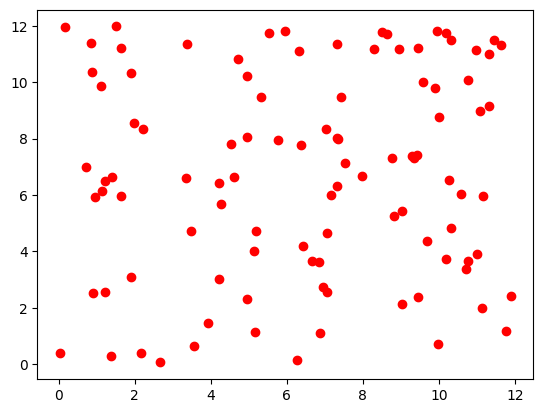

In [154]:
adjacency_matrix, xc, yc = generate_random_graph(100)
plt.plot(xc, yc, 'ro')

# Nombre de camion

IntProgress(value=0, layout=Layout(width='100%'), max=48)

Truck: 2
Truck: 3
Truck: 4
Truck: 5
Truck: 6
Truck: 7
Truck: 8
Truck: 9
Truck: 10
Truck: 11
Truck: 12
Truck: 13
Truck: 14
Truck: 15
Truck: 16
Truck: 17
Truck: 18
Truck: 19
Truck: 20
Truck: 21
Truck: 22
Truck: 23
Truck: 24
Truck: 25
Truck: 26
Truck: 27
Truck: 28
Truck: 29
Truck: 30
Truck: 31
Truck: 32
Truck: 33
Truck: 34
Truck: 35
Truck: 36
Truck: 37
Truck: 38
Truck: 39
Truck: 40
Truck: 41
Truck: 42
Truck: 43
Truck: 44
Truck: 45
Truck: 46
Truck: 47
Truck: 48
Truck: 49


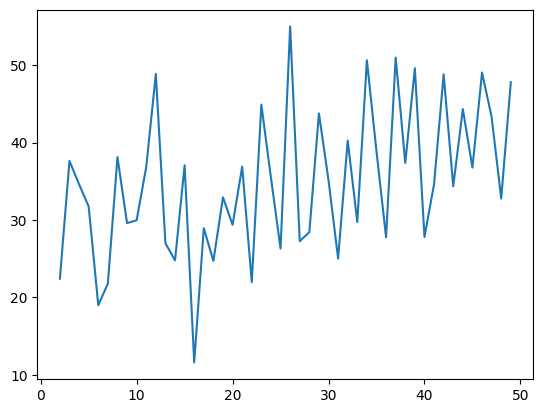

In [155]:
nb_truck = np.arange(2, 50, 1)
times = []

bar = IntProgress(min=0, max=len(nb_truck), layout={'width': '100%'})
display(bar)

for truck in nb_truck:
    print("Truck:", truck)

    start = time.time()
    best_individual = genetic_algorithm(adjacency_matrix, nb_truck=truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    end = time.time()
    times.append(end - start)
    bar.value += 1

# Remove progress bar
bar.close()


plt.plot(nb_truck, times)

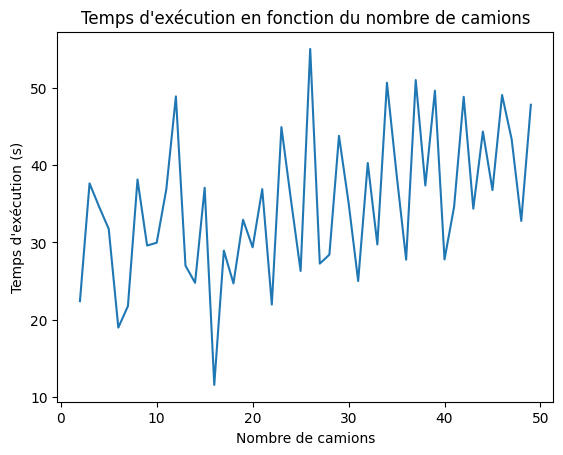

In [157]:
plt.title("Temps d'exécution en fonction du nombre de camions")
plt.xlabel("Nombre de camions")
plt.ylabel("Temps d'exécution (s)")
plt.plot(nb_truck, times)
plt.show()

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Références</h2>
    <ul>
        <li><a href="https://en.wikipedia.org/wiki/Vehicle_routing_problem">Vehicule Routing Problem</a>, Wikipedia (19 Mai 2023)</li>
        <li><a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">Travelling Salesman Problem</a>, Wikipedia (21 Mai 2023) </li>
        <li><a href="https://www.i3s.unice.fr/~malapert/publications/malapert-06-FT.pdf">Optimisation de tournées de véhicules pour
l’exploitation de Réseau Telecom</a>, Arnaud Malapert, i3s.unice.fr (6 Septembre 2006) </li>
    <li><a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj5n5if2K7_AhWzSaQEHQ-XCa8QFnoECAUQAQ&url=https%3A%2F%2Fwww.theses.fr%2F2016ARTO0203.pdf&usg=AOvVaw1ej2dEOSPQURBBChuKX1Nv">Les problèmes de collectes et livraisons avec collaboration et transbordements : modélisations et méthodes approchées</a>, Nicolas Danloup (1 décembre 2016)</li>
    </ul>